# Ch 5: Logistic Regression

### General approach to logistic regression

1.) <b>Collect</b>: Any method.

2.) <b>Prepare</b>: Numeric values are needed for distance calculation. A structured data format is best.

3.) <b>Analyze</b>: Any method.

4.) <b>Train</b>: We'll spend most of the time training, where we try to find optimal coefficients to classify our data.

5.) <b>Test</b>: Classification is quick and easy once the training step is done.

6.) <b>Use</b>: This application needs to get some input data and output structured numeric values. Next, the application applies the simple regression calculation on this input data and determines which class the input data should belong to. The application then takes some action on the calculated class.

### 5.1: Classification with logistic regression and the sigmoid function: a tractable step function

- Pros: Computationally inexpensive, easy to implement, knowledge representation easy to interpret

- Cons: Prone to underfitting, may have low accuracy

- Works with: Numeric values, nominal values

We'd like to have an equation we can give all of our features and it will predict the class. In the two-class case, the function will spit out a 0 or a 1. This is called a <b>Heavyside step function</b>, or the <b>Step Function</b>. The problem with the step function is that it makes instantaneous change at the end points. A better choice is a function called the <i>sigmoid</i>, given by the following equation:

$\sigma(z) = \frac{1}{1+e^{-z}}$

### 5.2: Using optimization to find the best regression coefficients

The input to the sigmoid function, z:

$z = w_0x_0 + w_1x_1+...+w_nx_n$

In vector notation: $z=w^Tx$

All that means is that we have two vectors of numbers and we'll multiply each element and add them up to get one number. The vector <b>x</b> is our input data, and we want to find the best coefficients <b>w</b>. To do this, we need to consider some ideas from optimization theory.

### 5.2.1: Gradient Ascent

Gradient ascent is based on the idea that if we want to find the maximum point on a function, then the best way to move is in the direction of the gradient. The gradient ascent algorithm in vector notation:

$w:=w+\alpha\nabla_wf(w)$

### 5.2.2: Train: using gradient ascent to find the best parameters

In [1]:
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('CH5_res/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat-h)
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

In [2]:
dataArr,labelMat=loadDataSet()
weights = gradAscent(dataArr,labelMat)
type(weights)

numpy.matrixlib.defmatrix.matrix

### 5.2.3: Analyze: plotting decision boundary

In [3]:
def plotBestFit(wei):
    import matplotlib.pyplot as plt
    %matplotlib inline
    if type(wei) == ndarray:
        weights = wei
    else:
        weights = wei.getA()
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

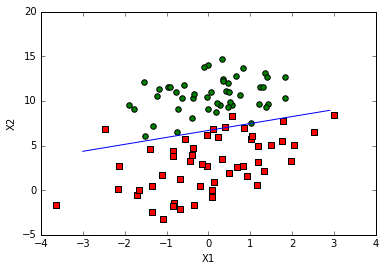

In [4]:
plotBestFit(weights)

### 5.2.4: Train: stochastic gradient ascent

- <b>Stochastic Gradient Ascent</b> - update the weights using only one instance at a time.

In [5]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [6]:
weights = stocGradAscent0(array(dataArr),labelMat)
type(weights)

numpy.ndarray

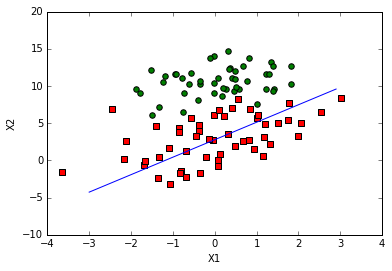

In [7]:
plotBestFit(weights)

In [8]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = arange(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            delete(dataIndex,randIndex)
        return weights

In [9]:
dataArr,labelMat = loadDataSet()

In [10]:
weights = stocGradAscent1(array(dataArr),labelMat,500)

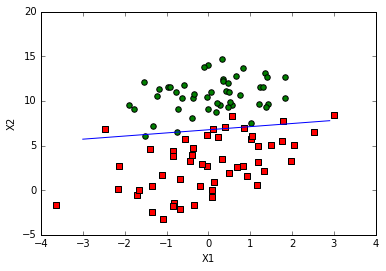

In [11]:
plotBestFit(weights)

### 5.3 Example: esitimating horse fatalities from colic

1.) <b>Collect</b>: Data file provided.

2.) <b>Prepare</b>: Parse a text file in Python, and fill in missing values.

3.) <b>Analyze</b>: Visually inspect the data.

4.) <b>Train</b>: Use an optimization algorithm to find the best coefficients.

5.) <b>Test</b>: To measure the success, we'll look at error rate. Depending on the error rate, we may decide to go back to the training step to try to find better values for the regression coefficients by adjusting the number of iterations and step size.

6.) <b>Use</b>: Building a simple command-line program to collect horse symptoms and output live/die diagnosis won't be difficult. I'll leave that up to you as an exercise.

### 5.3.1 Prepare: dealing with missing values in the data

Options for dealing with missing data:
- Use the feature's mean value from all the available data.
- Fill in the unknown with a special value like -1.
- Ignore the instance.
- Use a mean value from similar items.
- Use another machine learning algorithm to predict a value.

Setting the weight to 0 is good for missing data because it shouldn't affect the model for linear regression, since the equation

$weights = weights + alpha * error * dataMatrix[randIndex]$

turns into

$weights = weights$

when, the field is set to 0. 

### 5.3.2 Test: classifying with logistic regression

To classify with linear regression, you calculate the sigmoid of the vector under test multiplied by the weights optimized earlier. If the sigmoid gives you a value greater than 0.5, the class is 1, otherwise it is 0.

In [19]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0
    
def colicTest():
    frTrain = open('CH5_res/horseColicTraining.txt')
    frTest = open('CH5_res/horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights))!=int(currLine[21]):
            errorCount += 1
        
    errorRate = (float(errorCount)/numTestVec)
    print("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest():
    numTests = 10; errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [20]:
multiTest()

/Users/tedrand/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in exp


the error rate of this test is: 0.328358
the error rate of this test is: 0.417910
the error rate of this test is: 0.223881
the error rate of this test is: 0.298507
the error rate of this test is: 0.373134
the error rate of this test is: 0.447761
the error rate of this test is: 0.283582
the error rate of this test is: 0.358209
the error rate of this test is: 0.388060
the error rate of this test is: 0.373134
after 10 iterations the average error rate is: 0.349254
